In [1]:
# import os
# import shutil

# # Path to the directory containing preprocessed single image tensors
# source_directory = "/home/sklaptop/Downloads/OneDrive_2023-12-18/P25 - Visual Search/preprocessed_single_image_tensors"

# # Number of folders to split into
# num_folders = 5

# # Create destination folders
# for i in range(num_folders):
#     folder_path = f"/home/sklaptop/Downloads/OneDrive_2023-12-18/P25 - Visual Search/Split_Folder_{i+1}"
#     os.makedirs(folder_path, exist_ok=True)

# # Get all the file names in the source directory
# file_names = os.listdir(source_directory)

# # Calculate number of files per folder
# files_per_folder = len(file_names) // num_folders
# remainder = len(file_names) % num_folders

# # Distribute files among folders
# start_idx = 0
# for i in range(num_folders):
#     if i < remainder:
#         end_idx = start_idx + files_per_folder + 1
#     else:
#         end_idx = start_idx + files_per_folder

#     selected_files = file_names[start_idx:end_idx]

#     for file_name in selected_files:
#         source_file_path = os.path.join(source_directory, file_name)
#         dest_folder = i + 1  # Folder numbering starts from 1
#         dest_file_path = f"/home/sklaptop/Downloads/OneDrive_2023-12-18/P25 - Visual Search/Split_Folder_{dest_folder}/{file_name}"
#         shutil.copyfile(source_file_path, dest_file_path)

#     start_idx = end_idx


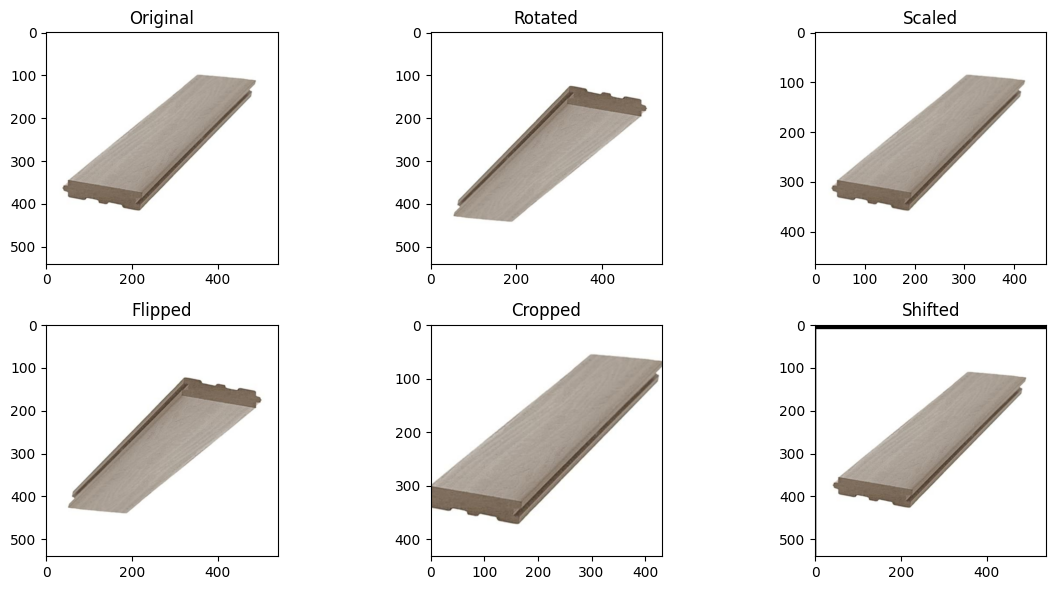

In [2]:
# import cv2
# import numpy as np
# import random
# import matplotlib.pyplot as plt

# # Load an image using OpenCV
# image = cv2.imread('/home/sklaptop/Downloads/OneDrive_2023-12-18/P25 - Visual Search/Subset/building-materials_decking-railing_aeratis78x318x12heritagetonguegrooveporchflooringweatheredwood.jpg')  # Replace 'path_to_your_image.jpg' with the image file path

# # Function to perform various geometric transformations
# def augment_image(image):
#     # Rotation
#     angles = [90, 180, 270]  # Rotation angles in degrees
#     angle = random.choice(angles)
#     height, width = image.shape[:2]
#     rotation_matrix = cv2.getRotationMatrix2D((width / 2, height / 2), angle, 1)
#     rotated_image = cv2.warpAffine(image, rotation_matrix, (width, height))

#     # Scaling
#     scale_factor = random.uniform(0.7, 1.3)  # Scale factor for zooming in or out
#     scaled_image = cv2.resize(image, None, fx=scale_factor, fy=scale_factor)

#     # Flipping (horizontal and vertical)
#     flip_code = random.choice([-1, 0, 1])  # 1: horizontal flip, 0: vertical flip, -1: both flips
#     flipped_image = cv2.flip(image, flip_code)

#     # Cropping
#     crop_height, crop_width = int(height * 0.8), int(width * 0.8)  # Crop dimensions
#     start_x = random.randint(0, width - crop_width)
#     start_y = random.randint(0, height - crop_height)
#     cropped_image = image[start_y:start_y+crop_height, start_x:start_x+crop_width]

#     # Shifting (translation)
#     x_shift = random.randint(-50, 50)  # Shifting along x-axis
#     y_shift = random.randint(-50, 50)  # Shifting along y-axis
#     shift_matrix = np.float32([[1, 0, x_shift], [0, 1, y_shift]])
#     shifted_image = cv2.warpAffine(image, shift_matrix, (width, height))

#     return rotated_image, scaled_image, flipped_image, cropped_image, shifted_image

# # Apply augmentations
# rotated, scaled, flipped, cropped, shifted = augment_image(image)

# # Display the original and augmented images using matplotlib
# plt.figure(figsize=(12, 6))

# plt.subplot(231), plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB)), plt.title('Original')
# plt.subplot(232), plt.imshow(cv2.cvtColor(rotated, cv2.COLOR_BGR2RGB)), plt.title('Rotated')
# plt.subplot(233), plt.imshow(cv2.cvtColor(scaled, cv2.COLOR_BGR2RGB)), plt.title('Scaled')
# plt.subplot(234), plt.imshow(cv2.cvtColor(flipped, cv2.COLOR_BGR2RGB)), plt.title('Flipped')
# plt.subplot(235), plt.imshow(cv2.cvtColor(cropped, cv2.COLOR_BGR2RGB)), plt.title('Cropped')
# plt.subplot(236), plt.imshow(cv2.cvtColor(shifted, cv2.COLOR_BGR2RGB)), plt.title('Shifted')

# plt.tight_layout()
# plt.show()


In [4]:
import cv2
import os
import numpy as np
import random
import matplotlib.pyplot as plt

In [ ]:
# Function to perform various geometric transformations
def augment_image(image):
    # Rotation
    angles = [90, 180, 270]  # Rotation angles in degrees
    angle = random.choice(angles)
    height, width = image.shape[:2]
    rotation_matrix = cv2.getRotationMatrix2D((width / 2, height / 2), angle, 1)
    rotated_image = cv2.warpAffine(image, rotation_matrix, (width, height))

    # Scaling
    scale_factor = random.uniform(0.7, 1.3)  # Scale factor for zooming in or out
    scaled_image = cv2.resize(image, None, fx=scale_factor, fy=scale_factor)

    # Flipping (horizontal and vertical)
    flip_code = random.choice([-1, 0, 1])  # 1: horizontal flip, 0: vertical flip, -1: both flips
    flipped_image = cv2.flip(image, flip_code)

    # Cropping
    crop_height, crop_width = int(height * 0.8), int(width * 0.8)  # Crop dimensions
    start_x = random.randint(0, width - crop_width)
    start_y = random.randint(0, height - crop_height)
    cropped_image = image[start_y:start_y+crop_height, start_x:start_x+crop_width]

    # Shifting (translation)
    x_shift = random.randint(-50, 50)  # Shifting along x-axis
    y_shift = random.randint(-50, 50)  # Shifting along y-axis
    shift_matrix = np.float32([[1, 0, x_shift], [0, 1, y_shift]])
    shifted_image = cv2.warpAffine(image, shift_matrix, (width, height))

    return rotated_image, scaled_image, flipped_image, cropped_image, shifted_image

# Function to save images to an output folder
def save_augmented_images(output_folder, original_filename, augmented_images):
    if not os.path.exists(output_folder):
        os.makedirs(output_folder)

    for i, augmented_image in enumerate(augmented_images):
        output_path = os.path.join(output_folder, f"{original_filename[:-4]}_augmented_{i}.jpg")
        cv2.imwrite(output_path, augmented_image)

# Function to process images in a folder and perform augmentations
def augment_images_in_folder(input_folder, output_folder):
    if not os.path.exists(input_folder):
        print(f"Input folder '{input_folder}' does not exist.")
        return

    if not os.path.exists(output_folder):
        os.makedirs(output_folder)

    image_files = [f for f in os.listdir(input_folder) if os.path.isfile(os.path.join(input_folder, f))]

    for file_name in image_files:
        image_path = os.path.join(input_folder, file_name)
        image = cv2.imread(image_path)

        # Apply augmentations
        rotated, scaled, flipped, cropped, shifted = augment_image(image)
        augmented_images = [rotated, scaled, flipped, cropped, shifted]

        # # Display the original and augmented images using matplotlib
        # plt.figure(figsize=(12, 6))

        # plt.subplot(231), plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB)), plt.title('Original')
        # plt.subplot(232), plt.imshow(cv2.cvtColor(rotated, cv2.COLOR_BGR2RGB)), plt.title('Rotated')
        # plt.subplot(233), plt.imshow(cv2.cvtColor(scaled, cv2.COLOR_BGR2RGB)), plt.title('Scaled')
        # plt.subplot(234), plt.imshow(cv2.cvtColor(flipped, cv2.COLOR_BGR2RGB)), plt.title('Flipped')
        # plt.subplot(235), plt.imshow(cv2.cvtColor(cropped, cv2.COLOR_BGR2RGB)), plt.title('Cropped')
        # plt.subplot(236), plt.imshow(cv2.cvtColor(shifted, cv2.COLOR_BGR2RGB)), plt.title('Shifted')

        # plt.tight_layout()
        # plt.show()

        # Save augmented images to output folder
        save_augmented_images(output_folder, file_name, augmented_images)

# Specify the folder paths for input and output
input_folder_path = '/home/sklaptop/Downloads/OneDrive_2023-12-18/P25 - Visual Search/Subset'  # Replace 'path_to_input_folder' with the folder containing images
output_folder_path = '/home/sklaptop/Downloads/OneDrive_2023-12-18/P25 - Visual Search/Subset-expanded'  # Replace 'path_to_output_folder' with the desired output folder

augment_images_in_folder(input_folder_path, output_folder_path)
